In [1]:
# Import modules
from obspy import read, UTCDateTime, Stream
from numpy import geomspace
from matplotlib.pyplot import figure, subplots
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from numpy import abs, mean, amin, amax
from pandas import read_csv, Timestamp, Timedelta
from os.path import join

from utils_basic import GEO_STATIONS_A, GEO_STATIONS_B, ROOTDIR_GEO
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_wavelet import get_cwt_freqs, get_stream_cwt
from utils_plot import plot_3c_waveforms_and_cwts, save_figure

In [2]:
# Inputs
## Data
stations = ["A04", "A09", "A01"]
starttime = Timestamp("2020-01-13T19:36:20")
dur = 15.0 # Duration in seconds

## Wavelet transform
wavelet = "cmor"
bandwidth = 20.0
center_freq = 2.0
scales = geomspace(2, 128, 100)

In [3]:
# Read the data
stream = read_and_process_windowed_geo_waveforms(starttime, dur, stations=stations)

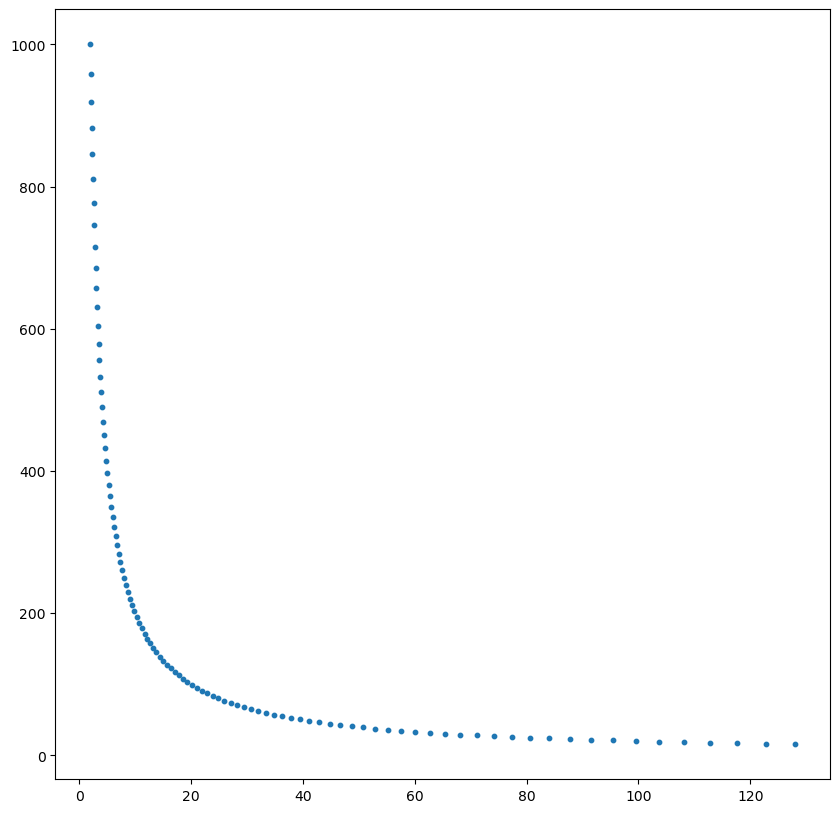

In [4]:
# Compute the frequencies corresponding to the scales and plot
freqs = get_cwt_freqs(scales, wavelet, bandwidth, center_freq)

fig, ax = subplots(1, 1, figsize=(10, 10))
ax.scatter(scales, freqs, s=10)

In [5]:
# Compute the spectra and cross-spectra
specs = get_stream_cwt(stream, wavelet=wavelet, scales=scales, bandwidth=bandwidth, center_freq=center_freq)

In [8]:
# Plot the waveforms and spectra
fig, axes = plot_3c_waveforms_and_cwts(stream, specs, ylim_wf=(-200, 200), ylim_freq=(0.0, 200.0), major_time_spacing=2, minor_time_spacing=1)

TypeError: plot_3c_waveforms_and_cwts() got an unexpected keyword argument 'ylim_freq'

In [7]:
# Save the figure
timestr = starttime.strftime("%Y-%m-%d-%H-%M-%S")
figname = f"deep_harmonic_tremor_waveforms_and_cwts_{timestr}_{dur:.0f}s.png"
save_figure(fig, figname, outdir=ROOTDIR_GEO)

Figure saved to /Volumes/OmanData/data/geophones/deep_harmonic_tremor_waveforms_and_cwts_2020-01-13-19-36-20_15s.png
